<a href="https://www.kaggle.com/code/pedrobuc/alinha?scriptVersionId=248544221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Alinha Imagem - PSI3471

**Pedro Buczinski Lages de Carvalho - 12555266**

In [1]:
import numpy as np 
import pandas as pd
import kagglehub
import cv2
import os
from math import atan2, degrees
import matplotlib.pyplot as plt

# **Importando as funções para encontrar orientação e retirar bordas pretas**

In [2]:
#Importei a função e "traduzi" para Python.
def find_center_and_orientation(src):
    m = cv2.moments(src, binaryImage=True)
    cen_x = m['m10'] / m['m00']
    cen_y = m['m01'] / m['m00']
    a = m['m20'] - m['m00'] * cen_x * cen_x
    b = 2 * m['m11'] - m['m00'] * (cen_x * cen_x + cen_y * cen_y)
    c = m['m02'] - m['m00'] * cen_y * cen_y

    theta = 0 if a == c else atan2(b, a - c) / 2.0

    return (cen_x, cen_y, theta)

def eliminas_linhas_pretas(img):
    
    # Converter para grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Para cada linha, verificar se é preta (todos os pixels com valor zero)
    linha_soma = np.sum(gray, axis=1)  # soma por linha

    # Índices das linhas que têm pixels não pretos
    linhas_com_dados = np.where(linha_soma > 0)[0]

    # Primeira e última linha com dados
    linha_inicio = linhas_com_dados[0]
    linha_fim = linhas_com_dados[-1] + 1

    # Cortar apenas nas bordas superior e inferior
    img_cortada = img[linha_inicio:linha_fim, :]
    
    return img_cortada

# **Redução e Alinhamento das Imagens do Dataset**

In [3]:
# Pastas de entrada e saída
pasta_input_base = '/kaggle/input/pistachio-image-dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
pastas = ['Kirmizi_Pistachio', 'Siirt_Pistachio']
pasta_output_base = '/kaggle/working/imagens_processadas'
os.makedirs(pasta_output_base, exist_ok=True) #cria o diretório aqui no Kaggle

tamanho_desejado = (64, 64)

for pasta in pastas:
    pasta_input = os.path.join(pasta_input_base, pasta)

    # Pasta para imagens reduzidas
    pasta_output_reduzida = os.path.join(pasta_output_base, f"{pasta}_reduzida")
    os.makedirs(pasta_output_reduzida, exist_ok=True)

    # Pasta para imagens alinhadas
    pasta_output_alinhada = os.path.join(pasta_output_base, f"{pasta}_alinhada")
    os.makedirs(pasta_output_alinhada, exist_ok=True)

    for arquivo in os.listdir(pasta_input):
        input_file = os.path.join(pasta_input, arquivo)
        img_colorida = cv2.imread(input_file)

        # SALVAR VERSÃO REDUZIDA
        img_reduzida = cv2.resize(img_colorida, tamanho_desejado, interpolation=cv2.INTER_AREA)
        nome_reduzida = f"R_{arquivo}"
        output_file_reduzida = os.path.join(pasta_output_reduzida, nome_reduzida)
        cv2.imwrite(output_file_reduzida, img_reduzida)

        #SALVAR VERSÃO ALINHADA
        img_gray = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)
        _, img_bin = cv2.threshold(img_gray, 1, 255, cv2.THRESH_BINARY) #retorna apenas a imagem binária
        cen_x, cen_y, theta = find_center_and_orientation(img_bin)

        angulo_graus = 90 - degrees(theta) #para alinhar verticalmete 
        matriz_rotacao = cv2.getRotationMatrix2D((cen_x, cen_y), angulo_graus, 1.0)
        img_alinhada = cv2.warpAffine(img_colorida, matriz_rotacao, (img_colorida.shape[1], img_colorida.shape[0]), flags=cv2.INTER_LINEAR)

        # Cortar linhas pretas superior/inferior e redimensionar
        img_cortada = eliminas_linhas_pretas(img_alinhada)
        img_final = cv2.resize(img_cortada, tamanho_desejado, interpolation=cv2.INTER_AREA)

        nome_alinhada = f"A_{arquivo}"
        output_file_alinhada = os.path.join(pasta_output_alinhada, nome_alinhada)
        cv2.imwrite(output_file_alinhada, img_final)

print("Imagens reduzidas e alinhadas salvas separadamente")

Imagens reduzidas e alinhadas salvas separadamente


# Demonstro algumas imagens reduzidas e alinhadas para cada pistache

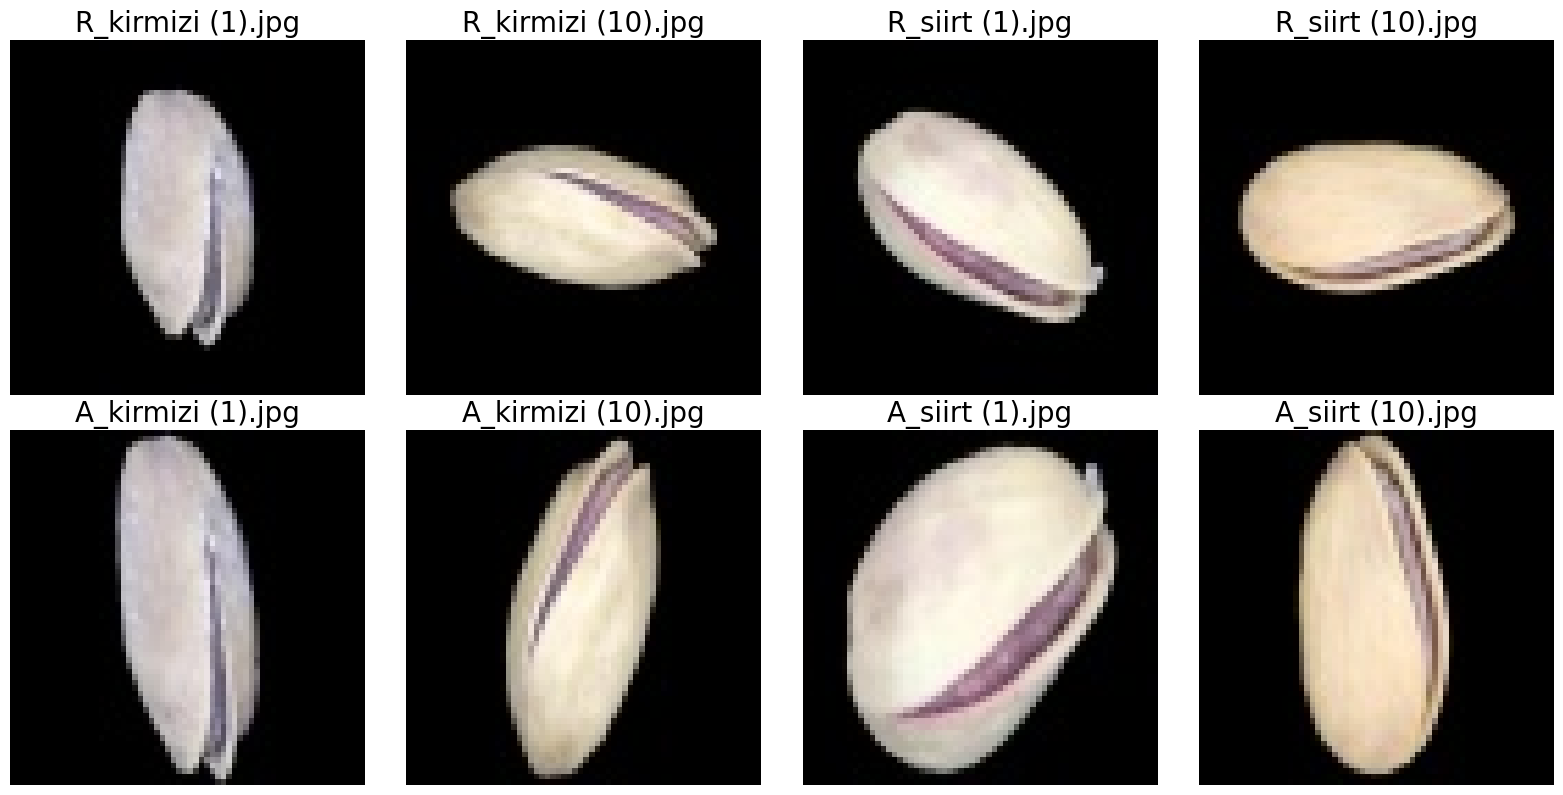

In [4]:
pastas = {
    'Kirmizi Reduzida': '/kaggle/working/imagens_processadas/Kirmizi_Pistachio_reduzida',
    'Siirt Reduzida': '/kaggle/working/imagens_processadas/Siirt_Pistachio_reduzida',
    'Kirmizi Alinhada': '/kaggle/working/imagens_processadas/Kirmizi_Pistachio_alinhada',
    'Siirt Alinhada': '/kaggle/working/imagens_processadas/Siirt_Pistachio_alinhada'
}

# Pega as 2 primeiras imagens de cada pasta
imagens = []
for nome, pasta in pastas.items():
    arquivos = sorted(os.listdir(pasta))[:2]
    caminhos = [os.path.join(pasta, arq) for arq in arquivos]
    imagens.extend(caminhos)

# Mostrar 2x4 imagens
plt.figure(figsize=(16, 8))

for i, imagem in enumerate(imagens):
    img = cv2.imread(imagem)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(os.path.basename(imagem), fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()